# Demos and Cool Stuff

#### Quentin CAUDRON  <br /> <br />  Ecology and Evolutionary Biology <br /> <br />  qcaudron@princeton.edu <br /> <br />  @QuentinCAUDRON

In [3]:
import numpy as np
from scipy.integrate import odeint
import scipy.stats as st
import scipy.spatial as sp
import scipy.ndimage as nd
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import lmfit as lm
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets, svm
from sklearn.cross_validation import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import pickle
import seaborn as sns
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (14, 5)
seaborn.set_style("darkgrid")

### LMFit : Nonlinear, Constrained Minimisation

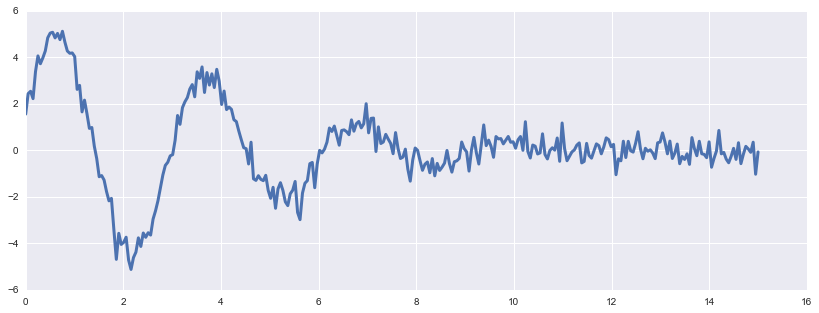

In [4]:
# http://lmfit.github.io/lmfit-py/parameters.html#simple-example

# Let's create a damped sinusoid
# True function :
# 5 sin(2x + 0.3) * exp(-0.03*(x^2))

x = np.linspace(0, 15, 300)
y = 5 * np.sin(2 * x + 0.3) * np.exp(-0.03 * (x**2)) + np.random.normal(size=len(x), scale=0.4)
plt.plot(x, y, lw=3)

In [5]:
help(lm)

Help on package lmfit:

NAME
    lmfit

DESCRIPTION
    Lmfit provides a high-level interface to non-linear optimization and curve
    fitting problems for Python. Lmfit builds on Levenberg-Marquardt algorithm of
    scipy.optimize.leastsq(), but also supports most of the optimization methods
    from scipy.optimize.  It has a number of useful enhancements, including:
    
      * Using Parameter objects instead of plain floats as variables.  A Parameter
        has a value that can be varied in the fit, fixed, have upper and/or lower
        bounds.  It can even have a value that is constrained by an algebraic
        expression of other Parameter values.
    
      * Ease of changing fitting algorithms.  Once a fitting model is set up, one
        can change the fitting algorithm without changing the objective function.
    
      * Improved estimation of confidence intervals.  While
        scipy.optimize.leastsq() will automatically calculate uncertainties and
        correlations 

[[Fit Statistics]]
    # function evals   = 163
    # data points      = 300
    # variables        = 5
    chi-square         = 45.913
    reduced chi-square = 0.156
[[Variables]]
    amplitude:   5.10797781 +/- 0.110319 (2.16%) (init= 10)
    phase:       0.28916941 +/- 0.022418 (7.75%) (init= 0)
    frequency:   2.01308986 +/- 0.007667 (0.38%) (init= 1)
    decay:      -0.03885996 +/- 0.008079 (20.79%) (init=-0.1)
    power:       1.87331799 +/- 0.106304 (5.67%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(decay, power)              =  0.985 
    C(phase, frequency)          = -0.802 
    C(amplitude, decay)          = -0.739 
    C(amplitude, power)          = -0.676 
    C(amplitude, phase)          = -0.191 
    C(amplitude, frequency)      =  0.157 
    C(phase, decay)              =  0.148 
    C(phase, power)              =  0.136 
    C(frequency, decay)          = -0.121 
    C(frequency, power)          = -0.111 


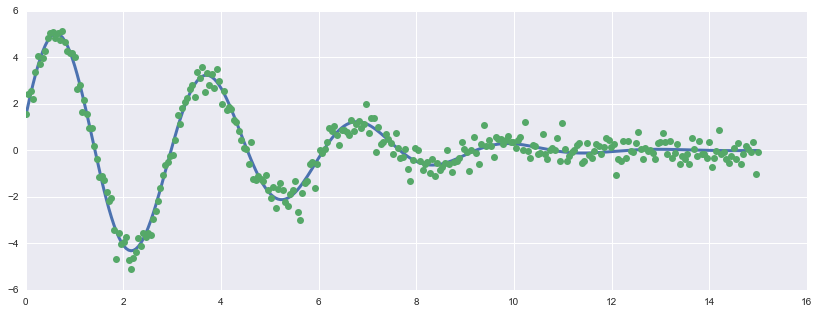

In [7]:
# We can use lmfit to fit this function to a model
def objectivefunction(params, x, data) :
    amplitude = params["amplitude"].value
    phase = params["phase"].value
    frequency = params["frequency"].value
    decay = params["decay"].value
    power = params["power"].value
    
    model = amplitude * np.sin(frequency * x + phase) * np.exp(decay * (x**power))
    return model - data


# We create a parameters structure
params = lm.Parameters()
params.add("amplitude", value=10, min=0)
params.add("phase", value=0, min=-np.pi, max=np.pi)
params.add("frequency", value=1)
params.add("decay", value=-0.1, max=-0.01)
params.add("power", value=1, min=0.5)

# Fit the function
result = lm.minimize(objectivefunction, params, args = (x, y))

plt.plot(x, y + result.residual, linewidth=3)
plt.plot(x, y, "o")

lm.report_fit(result)

In [6]:
help(lm.Parameters)

Help on class Parameters in module lmfit.parameter:

class Parameters(collections.OrderedDict)
 |  A dictionary of all the Parameters required to specify a fit model.
 |  
 |  All keys must be strings, and valid Python symbol names, and all values
 |  must be Parameters.
 |  
 |  Custom methods:
 |  ---------------
 |  
 |  add()
 |  add_many()
 |  dumps() / dump()
 |  loads() / load()
 |  
 |  Method resolution order:
 |      Parameters
 |      collections.OrderedDict
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |      add Parameters objects
 |  
 |  __deepcopy__(self, memo)
 |  
 |  __iadd__(self, other)
 |      add/assign Parameters objects
 |  
 |  __init__(self, asteval=None, *args, **kwds)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __reduce__(self)
 |      Required to pickle a Parameters instance.
 |  
 |  __setitem__(self, key, par)
 |      Set self[key] to value.
 |  
 |  __setst

### Pickle - Saving Python Objects to Disk

In [9]:
# Create a dictionary of random objects
x = { "Species": "Homo sapiens", "Age": 73, "Foods" : ["Chocolate", "Coffee", "Waffles"] }

# Let's save this arbitrary object to file
pickle.dump(x, open("files/pickled_human.p", "wb"))

# Now let's read it back in
human = pickle.load(open("files/pickled_human.p", "rb"))

# We can access it as normal
print(human["Foods"])

['Chocolate', 'Coffee', 'Waffles']


### Scikit-Learn : Machine Learning

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]] 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


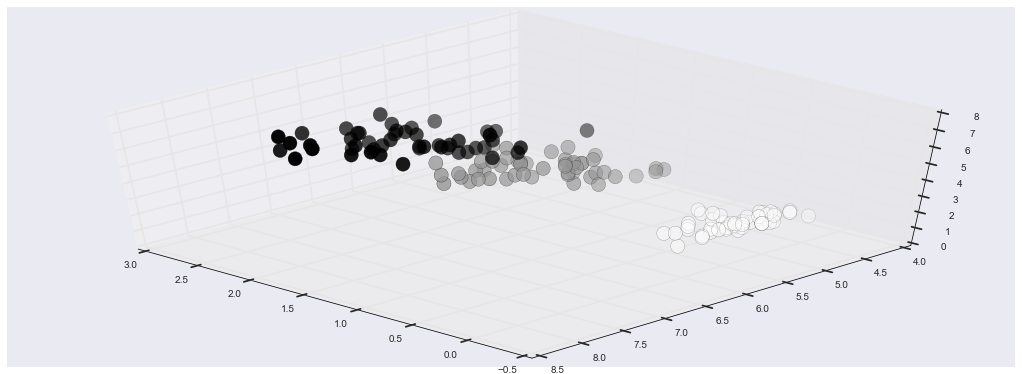

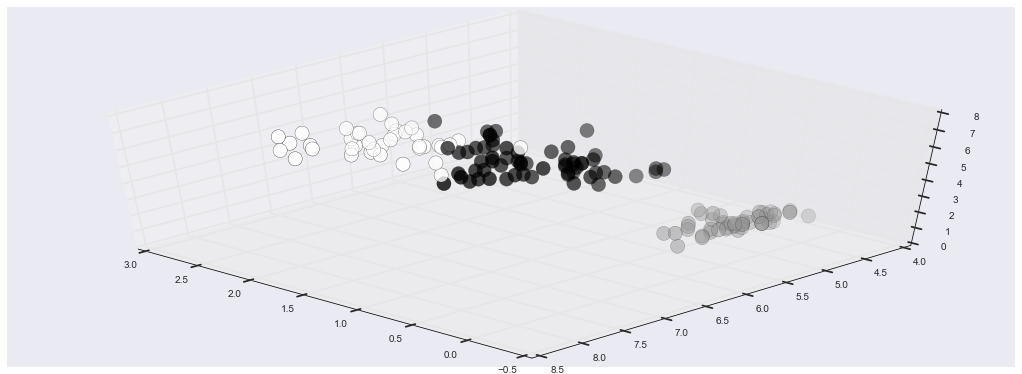

In [10]:
# http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
# K-Means Clustering

# Let's load the Iris database
iris = datasets.load_iris()
X = iris.data # first two features only
y = iris.target # classes

# First five measurements, and all of the classes
print(X[:5, :], "\n")
print(y)

kmeans = KMeans(n_clusters=len(np.unique(y)))
kmeans.fit(X, y)


fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, s=200)

fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=kmeans.predict(X), s=200)

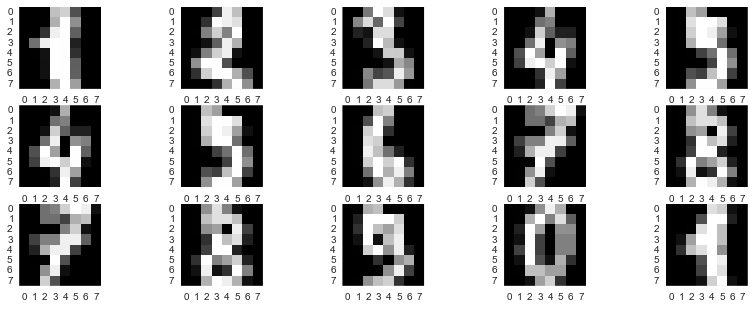

In [10]:
# http://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction
# SVC

# Let's load the digits database
digits = datasets.load_digits()

# What do these digits look like ?
for i in range(1, 6) :
    for j in range(3) :
        plt.subplot(3, 5, j*5 + i)
        plt.imshow(digits.images[j*3 + i], cmap="gray", interpolation="none")
        plt.grid(b=False)

In [11]:
help(svm.SVC())

Help on SVC in module sklearn.svm.classes object:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'pol

In [11]:
# Do not run this cell unless you're happy to wait a little while

# I want to run some error analysis.
# We're going to split the dataset into a variable number of train and test samples,
# and from there, we'll see how the mean error changes with the train / test fraction

Success = [] # empty list
fraction = np.exp(np.linspace(np.log(0.001), np.log(0.5), 30)) # the fraction of the dataset to reserve for testing

for i in fraction :

    success = [] # empty list to keep our measurements for a given fraction
    
    for j in range(20) : # twenty random repetitions
        # Let's split the dataset randomly
        traindata, testdata, traintarget, testtarget = train_test_split(digits.data, digits.target, test_size=i)

        # Fit the classifier
        classifier = svm.SVC()
        classifier.fit(traindata, traintarget)

        # Calculate success rate
        success.append(np.sum(classifier.predict(testdata) == testtarget) / float(len(testtarget)))
    
    # Append all twenty measurements to our list 
    Success.append(success)

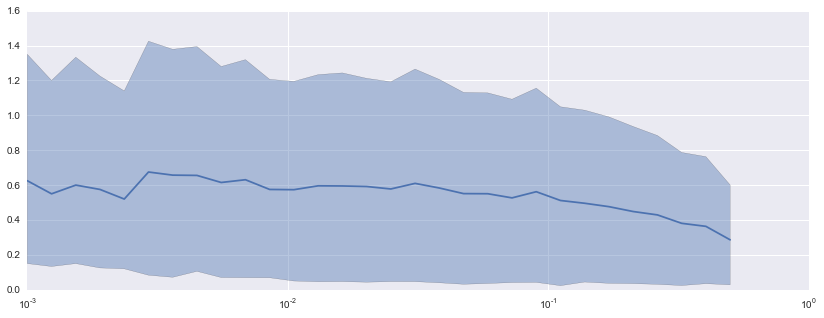

In [12]:
# OK, let's plot our results. First, let's calculate the mean success rate
meansuccess = np.mean(Success, axis=1)

# And bootstrap some confidence intervals
confint = [bootstrap.ci(np.array(Success)[i, :]) for i in range(len(meansuccess))]

# Drop our CIs around the plot
CIdown = [meansuccess[i] - confint[i][0] for i in range(len(meansuccess))]
CIup = [meansuccess[i] + confint[i][1] for i in range(len(meansuccess))]

# And plot
plt.semilogx(fraction, meansuccess)
plt.fill_between(fraction, CIdown, y2=CIup, alpha=0.4)

# PrincetonPy

### princetonpy.com

Join our mailing list, discuss code on the forums, see upcoming sessions